# Tugas Akhir Deep Learning

### Anggota :
#### 5180411043 - Prayoga

# Import Libraries

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from PIL import Image
from random import shuffle
import numpy as np
import zipfile

# Definisi arsitektur

In [2]:
def defineStructure(X, Y):
    input = X.shape[0]  # Ukuran input layer
    hidden = 80         # hidden layer 
    output = Y.shape[0] # Ukuran Output layer
    return (input, hidden, output)

# Load Dataset Flowers dari kaggle

In [3]:
FILE_PATH = 'Dataset/flowers.zip'

EXTRACTED_PATH = '/tmp/flowers/'
RESIZED_PATH = '/tmp/resized/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extrax file ke 'flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# mengubah ukuran images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData():
    for folder in USED_CLASSES:
        img_files = os.listdir(EXTRACTED_PATH + folder)
        number = 0
        for item in img_files:
            if item.endswith(".jpg") and number < 100:
                os.makedirs(os.path.dirname(RESIZED_PATH + folder + '/'), exist_ok=True)
                img = Image.open(EXTRACTED_PATH + folder + '/' + item)
                new_img = img.resize((320, 240))
                new_img.save(RESIZED_PATH + folder + '/' + item)
                if folder == 'rose':
                    ROSE_DATA.append((item, folder))
                if folder == 'sunflower':
                    SUNFLOWER_DATA.append((item, folder))
                if folder == 'dandelion':
                    DANDELION_DATA.append((item, folder))
                number+=1

loadData()

shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

In [4]:
print(len(ROSE_DATA))
print(ROSE_DATA[0][0])
# 12313123123.jpg
print(ROSE_DATA[0][1])
# rose

100
14267691818_301aceda07.jpg
rose


#  3 kolom atau class dataset

['dandelion', 'rose', 'sunflower']
5
['dandelion', 'rose', 'sunflower']
5
['dandelion', 'rose', 'sunflower']
5


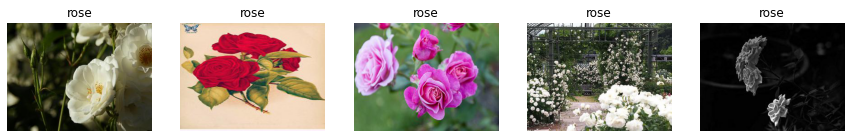

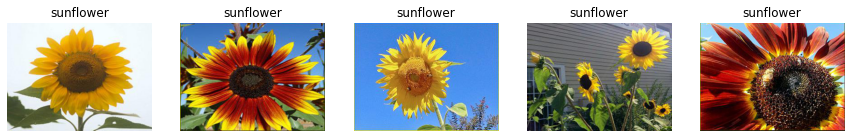

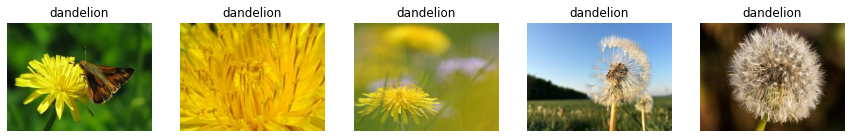

In [5]:
def displayImages(images, final=False, cols=5):
  #menampilkan gambar yang diberikan dan labelnya dalam kotak
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []
  if final:
      folder = FINAL_PATH
  else:
      folder = RESIZED_PATH
  subdirs = os.listdir(folder)
  print(subdirs)
  for subdir in subdirs:
      
    
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))

  print(len(result))
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    if final:
        plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    else:
        plt.imshow(image)
    
displayImages(ROSE_DATA[:5], False)
displayImages(SUNFLOWER_DATA[:5], False)
displayImages(DANDELION_DATA[:5], False)

['dandelion', 'rose', 'sunflower']
5
['dandelion', 'rose', 'sunflower']
5


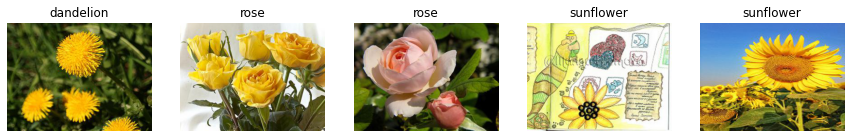

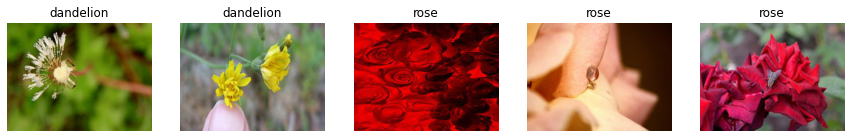

In [6]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
displayImages(TRAIN_DATA[:5], False)
displayImages(TEST_DATA[:5], False)

# convert ke grayscale


In [7]:
def convert2Grayscale(images, folder_name):
    os.makedirs(os.path.dirname(FINAL_PATH + folder_name + '/'), exist_ok=True)
    images2convert = [(Image.open(RESIZED_PATH + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
    for i, (image, image_class) in enumerate(images2convert):
        new_image = image.convert('L')
        new_image.save(FINAL_PATH + folder_name + '/' + images[i][0])

convert2Grayscale(TRAIN_DATA, "train_data")
convert2Grayscale(TEST_DATA, "test_data")
print(TRAIN_DATA[:5], TEST_DATA[5])

[('12323859023_447387dbf0_n.jpg', 'sunflower'), ('12243068283_ee4c2683e2_n.jpg', 'rose'), ('14058811536_f29cd7bd58_n.jpg', 'dandelion'), ('1402130395_0b89d76029.jpg', 'rose'), ('10541580714_ff6b171abd_n.jpg', 'sunflower')] ('14858674096_ed0fc1a130.jpg', 'sunflower')


In [8]:
displayImages(TRAIN_DATA[5], True)
displayImages(TEST_DATA[5], True)

['test_data', 'train_data']
0
['test_data', 'train_data']
0


<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

# Gambar Numpy ke array

In [9]:
def convert2npArray(images, folder_name):
    """
    params:
    -------
    images: list([nama_file, flower_class])
    folder_name: str(roses | dandelion | sunflower | train_data | test_data)
    
    returns:
    --------
    tuple(np.ndarray(X), list(classes))
    """
    array = []
    flowers = []
    for img, flower in images:
        data = np.asarray(Image.open(FINAL_PATH + folder_name + img))
        # print(type(data))
        # print(data.shape)
        array.append((data/255.0).flatten())
        # if flower == "rose":
        #   flowers.append(np.array([0,0], dtype=np.float64))
        # if flower == "dandelion":
        #   flowers.append(np.array([0,1], dtype=np.float64))
        # if flower == "sunflower":
        #   flowers.append(np.array([1,0], dtype=np.float64))
        if flower == "rose":
          flowers.append(np.array([0,0,1], dtype=np.float64))
        if flower == "dandelion":
          flowers.append(np.array([0,1,0], dtype=np.float64))
        if flower == "sunflower":
          flowers.append(np.array([1,0,0], dtype=np.float64))
    return np.array(array, dtype=np.float64), np.array(flowers, dtype=np.float64)



TRAIN_X, TRAIN_Y = convert2npArray(TRAIN_DATA, "train_data/")
TEST_X, TEST_Y = convert2npArray(TEST_DATA, "test_data/")
X_train = TRAIN_X.T
# print(TRAIN_Y.shape)
Y_train = TRAIN_Y.T.reshape(3, TRAIN_Y.shape[0])
# print(Y_train.shape)
X_test = TEST_X.T
Y_test = TEST_Y.T.reshape(3, TEST_Y.shape[0])
# print(TRAIN_X.shape)
# print(X_train)
# print(TRAIN_Y)
# print(TRAIN_Y)
# for i in range(Y_train.shape[1]):
#   print(Y_train[:,i])

print ('Train X Shape:', X_train.shape)
print ('Train Y Shape:', Y_train.shape)

print ('\nTraining data = {}'.format(X_train.shape[1]))
print ('Testing data = {}'.format(X_test.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

Train X Shape: (76800, 240)
Train Y Shape: (3, 240)

Training data = 240
Testing data = 60

Test X Shape:  (76800, 60)


# Fungsi Aktivasi Sigmoid

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Backpropagation Init bobot dan bias

In [11]:
def parametersInitialization(input_unit, hidden_unit, output_unit):
    
    print(input_unit, hidden_unit, output_unit)
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# Backpropagation Fungsi Error

In [12]:


def crossEntropyCostDef(A2, Y):
    # Jumlah untuk data training
    m = Y.shape[1] 
    print(A2)
    print(len(Y))
    # Menghitung cross-entropy
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    return cost

def gradientDescent(parameters, grads, learning_rate = 0.1):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

parameters = parametersInitialization(76800, 80, 3)

76800 80 3


# Backpropagation - Feedforward

In [13]:
def forwardPropagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

# Backpropagation - Backward

In [14]:
def backwardPropagation(parameters, cache, X, Y):
    #Jumlah untuk data training
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

# Backpropagation - Prediksi

In [15]:
def predictionBin(parameters, X):
    A2, cache = forwardPropagation(X, parameters)
    predictions = np.round(A2)
    return predictions

def prediction(parameters, X):
    A2, cache = forwardPropagation(X, parameters)
    predictions = (np.argmax(A2, axis=0))
    # print((np.argmax(Y, axis=0)))
    return predictions

p = prediction(parameters,X_train)
print(p)
# print(Y_train)
print((np.argmax(Y_train, axis=0)))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 2 1 2 0 2 2 1 0 1 1 0 2 1 1 0 2 0 2 1 1 2 1 0 1 0 1 0 1 2 1 1 0 2 2 1 0
 2 0 2 0 2 2 0 0 2 1 1 2 0 0 1 1 2 1 2 2 2 2 0 1 2 2 0 1 2 0 1 0 1 0 1 0 2
 2 0 2 1 1 1 1 0 1 0 1 0 1 2 1 2 0 2 1 2 0 2 0 2 2 0 1 0 2 2 2 2 0 2 0 1 0
 1 1 2 1 0 2 0 2 1 1 0 1 2 1 0 0 0 2 2 2 0 0 1 2 2 0 1 0 2 0 1 1 1 1 0 1 2
 0 0 2 2 0 0 2 0 2 0 1 1 2 2 0 0 0 0 0 1 2 2 2 2 2 2 0 2 1 2 0 0 0 0 0 1 0
 1 1 1 1 0 2 2 0 1 0 0 2 2 1 2 2 0 1 1 2 1 2 2 1 0 1 0 1 1 2 0 2 2 1 1 1 1
 0 1 1 0 1 2 1 1 0 0 2 1 2 0 1 0 0 1]


# Backpropagation - Akurasi

In [16]:
def accuracy(predictions, Y):
    real = np.argmax(Y, axis=0)
    dataLength = len(predictions)
    acc = 0
    error = 0
    for i in range(len(predictions)):
        if predictions[i] == real[i]:
            acc += 1
        else:
            error += 1
    acc = (acc/dataLength)
    error = (error/dataLength)
    # print(f'acc = {acc}\terr = {error}')
    return acc, error
    
def accuracyBin(predictions, Y):
    real = Y
    dataLength = predictions.shape[1]
    acc = 0
    error = 0
    for i in range(dataLength):
        if predictions[0][i]==real[0][i] and predictions[1][i]==real[1][i]:
            acc += 1
        else:
            error += 1
    acc = acc/dataLength
    error = error/dataLength
    print(f'acc = {acc}\terr = {error}')
    print(predictions)
    print(Y)
    return acc, error

print(accuracy(p, Y_train))

(0.3333333333333333, 0.6666666666666666)


# Backpropagation - Model Training Testing

In [17]:
def training(X, Y, hidden_unit, num_iterations = 1000, learning_rate = 0.1):
    # np.random.seed(3)
    input_unit = defineStructure(X, Y)[0]
    output_unit = defineStructure(X, Y)[2]
    # print("Output:",output_unit)
    
    parameters = parametersInitialization(input_unit, hidden_unit, output_unit)
    # print(parameters)

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    accList = []
    error = []
    for i in range(0, num_iterations):
        A2, cache = forwardPropagation(X, parameters)
        cost = crossEntropyCostDef(A2, Y)
        grads = backwardPropagation(parameters, cache, X, Y)
        parameters = gradientDescent(parameters, grads, learning_rate)
        predictions = prediction(parameters, X)
        acc, err = accuracy(predictions, Y)
        # predictions, acc, err = prediction(parameters, X, Y)
        accList.append(acc)
        error.append(err)
        if i % 5 == 0:
            print ("[Cost, Acc, Err] after iteration %i: %f %f %f" %(i, cost, acc, err))
    
    return parameters, accList, error, predictions


# Learning Rate 0.2

In [18]:
print("TRAINING (LR 0.2):")
(input_unit, hidden_unit, output_unit) = defineStructure(X_train, Y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))
parameters, accList, errorList, predictions = training(X_train, Y_train, 80, num_iterations=50, learning_rate=0.2)
print(predictions)
# # print(Y_train)
# print(np.argmax(Y_train, axis=0))

TRAINING (LR 0.2):
The size of the input layer is:  = 76800
The size of the hidden layer is:  = 80
The size of the output layer is:  = 3
76800 80 3
[[0.49985381 0.49856752 0.49552914 0.49912822 0.49922699 0.49914172
  0.49857617 0.49862756 0.49821552 0.49842866 0.49732942 0.49712396
  0.50231897 0.50157041 0.49518246 0.50025728 0.49823125 0.49608613
  0.49565388 0.49667849 0.49628896 0.49726062 0.49890005 0.49854293
  0.4980455  0.49700439 0.49762024 0.49814359 0.49957027 0.49745552
  0.49937899 0.49421145 0.49144917 0.49716155 0.50136409 0.49667073
  0.49749289 0.49925318 0.49341218 0.49884802 0.49702908 0.49719173
  0.50027562 0.49652609 0.49887055 0.49626974 0.50128593 0.49893715
  0.49574876 0.49298333 0.49792102 0.49599721 0.49523282 0.49695828
  0.49693121 0.49489272 0.49888611 0.49045839 0.49707453 0.49861624
  0.49539136 0.50187203 0.49660246 0.49525919 0.49798967 0.49469387
  0.49915077 0.49872638 0.49667732 0.50104388 0.49846936 0.49843252
  0.49602672 0.49648941 0.4957642  0

[[0.30175632 0.3010991  0.29498259 0.30215179 0.30109222 0.30865884
  0.30717182 0.30041708 0.30191213 0.30016436 0.29525868 0.30539023
  0.30630158 0.29993481 0.3055917  0.30357075 0.29762703 0.30050592
  0.31447901 0.30260846 0.30003335 0.30513464 0.30149649 0.30197537
  0.30257283 0.29837259 0.29306848 0.29968355 0.30141195 0.30498302
  0.3001749  0.3000402  0.29739276 0.30270476 0.30202506 0.30236283
  0.3000729  0.31248906 0.29474069 0.30239838 0.30158134 0.30221567
  0.30205588 0.30099856 0.30219278 0.30465662 0.29620582 0.29556621
  0.31703721 0.29620185 0.30774766 0.30027184 0.29632903 0.30203858
  0.29946721 0.29996251 0.30102753 0.29143271 0.29464051 0.30362409
  0.30466284 0.30216794 0.30171792 0.29737999 0.29979445 0.30046773
  0.30290395 0.30136093 0.29948931 0.30003155 0.30237033 0.30231384
  0.3001145  0.30045289 0.30055579 0.30208929 0.29922156 0.30725731
  0.30173913 0.29495645 0.2970134  0.30018212 0.30093965 0.30215296
  0.3014985  0.30040916 0.2991088  0.30103606 0.

[[0.27974442 0.28199149 0.27271339 0.27732425 0.28077645 0.28334287
  0.28444228 0.27227484 0.28159218 0.27964463 0.25765487 0.28298529
  0.28291435 0.27948112 0.28322132 0.28229672 0.273491   0.27877219
  0.28643508 0.28095701 0.27833958 0.26088677 0.2791133  0.28060043
  0.28176392 0.27699186 0.26354311 0.27805918 0.28087872 0.25981035
  0.27948137 0.27349523 0.27465187 0.27947835 0.278746   0.28115734
  0.27869157 0.28683104 0.27155235 0.28005712 0.27908192 0.28098863
  0.27952962 0.27956211 0.27989127 0.28130921 0.2751589  0.27303967
  0.28937048 0.27094943 0.28348112 0.27883597 0.26262313 0.28072211
  0.27510674 0.27182026 0.28079286 0.2516073  0.26929615 0.28129468
  0.27972482 0.27566094 0.28055835 0.27826814 0.2788947  0.28112749
  0.28160802 0.27979025 0.27762488 0.28023149 0.2823886  0.28001031
  0.28147742 0.27965487 0.27830457 0.27307238 0.27777621 0.28238458
  0.27776454 0.26985984 0.25100996 0.28177306 0.27284003 0.281469
  0.27386353 0.279238   0.27471455 0.28071872 0.26

[[0.30052539 0.30469914 0.29707173 0.2992828  0.29994824 0.30979481
  0.30642149 0.29826013 0.30532274 0.300854   0.28144227 0.30653389
  0.30669243 0.30361385 0.30543289 0.30759199 0.29688954 0.30244269
  0.30789304 0.30458529 0.29843885 0.2674786  0.2999383  0.30417435
  0.3052741  0.29643289 0.29292348 0.29815313 0.30290065 0.26683925
  0.29946421 0.29905218 0.30067698 0.30390649 0.30159173 0.30141333
  0.29971259 0.3133773  0.29713096 0.30255537 0.30100135 0.30279329
  0.30169034 0.29958993 0.30161475 0.30074486 0.2969801  0.29567979
  0.30237476 0.29837138 0.30793465 0.29990366 0.28792821 0.30351408
  0.29810389 0.29706954 0.30254254 0.27278363 0.29595751 0.3038034
  0.30681626 0.30314296 0.30093744 0.29974678 0.29937257 0.30253595
  0.30100436 0.30123497 0.29735632 0.30205001 0.30380864 0.30246376
  0.30484726 0.29894506 0.30135778 0.30134149 0.29903241 0.30488694
  0.30137271 0.29535894 0.25666189 0.30627901 0.29839947 0.30162343
  0.30074606 0.3007687  0.30021819 0.30311599 0.2

[[0.3450191  0.34408294 0.33046746 0.33016202 0.33707529 0.34507974
  0.35120406 0.33049023 0.35135471 0.33931868 0.31593288 0.35056054
  0.35156359 0.33807764 0.34203061 0.35261298 0.33000174 0.34152353
  0.34309859 0.35164226 0.34025912 0.2847487  0.34027074 0.35229926
  0.34754595 0.33130012 0.32434678 0.33792944 0.34298217 0.28460301
  0.33767246 0.33075795 0.33526063 0.35356015 0.33867975 0.33657145
  0.3407097  0.34891991 0.33158778 0.34089937 0.34586385 0.33851662
  0.34757561 0.33867895 0.34177908 0.34153166 0.32699378 0.32733185
  0.32849205 0.3311821  0.35347373 0.33852422 0.32136472 0.34518835
  0.33077724 0.32855416 0.33967588 0.3072594  0.32676962 0.34159328
  0.3436076  0.33428005 0.34565616 0.34207164 0.33921833 0.34250481
  0.33927025 0.33502012 0.33734246 0.33707441 0.34579333 0.33938615
  0.3502026  0.34097003 0.34042777 0.33334793 0.34382722 0.33835914
  0.33517833 0.32667747 0.27269005 0.35346493 0.32965516 0.34051367
  0.33127906 0.34418619 0.33155601 0.34204204 0.

[[0.39194156 0.39162132 0.35682524 0.35242313 0.38362121 0.37325818
  0.39291587 0.35193134 0.39241451 0.38914088 0.33949711 0.39224318
  0.39223435 0.3771968  0.38555567 0.39216386 0.36233753 0.38630078
  0.37126755 0.39211982 0.39103168 0.29199115 0.38953848 0.39253994
  0.39144469 0.36786716 0.34527507 0.38591572 0.38703264 0.29200266
  0.38919671 0.35445496 0.37411413 0.39169755 0.38485478 0.38101365
  0.39015724 0.37738785 0.36025689 0.38992234 0.39165704 0.37620499
  0.39151982 0.38696729 0.38853585 0.38750441 0.35073806 0.35165164
  0.34708092 0.35381697 0.39478067 0.3859942  0.34462518 0.39185292
  0.35680828 0.35300853 0.3863525  0.3317834  0.34734709 0.38513586
  0.3780596  0.35753102 0.39171811 0.38955944 0.3875907  0.38819556
  0.38161463 0.37472893 0.3867243  0.38426423 0.39175159 0.38338902
  0.39122006 0.39095485 0.38728038 0.35374021 0.39177667 0.37360739
  0.36495208 0.34766592 0.27901862 0.3940188  0.35215015 0.38893672
  0.35199304 0.39073918 0.35646972 0.3877947  0.

[Cost, Acc, Err] after iteration 10: 1.910002 0.362500 0.637500
[[0.41259221 0.41274834 0.37037926 0.36149716 0.40865753 0.38978982
  0.41435747 0.35836052 0.41344305 0.41195978 0.34676682 0.41324807
  0.41293782 0.39987308 0.41051133 0.41287053 0.38453898 0.41106452
  0.38933391 0.41279133 0.41245495 0.29577603 0.41223047 0.41342982
  0.41337772 0.39247284 0.34973075 0.4105189  0.41098637 0.2961172
  0.41212126 0.36373174 0.39806969 0.41251165 0.41045437 0.40785677
  0.41228677 0.39396288 0.37423836 0.41180532 0.41268439 0.40152775
  0.41264681 0.41150587 0.41245527 0.41127222 0.3608746  0.36255319
  0.35815815 0.36136666 0.4159461  0.41066221 0.35043709 0.41332374
  0.37174165 0.36317678 0.41073032 0.34262975 0.35069066 0.40968848
  0.40194407 0.36665057 0.41270452 0.41230298 0.41169496 0.41307303
  0.40852926 0.40031325 0.41154833 0.40816293 0.41282222 0.4088706
  0.41305104 0.41245104 0.41153718 0.35955932 0.4125205  0.39687026
  0.38282545 0.3516225  0.28014359 0.4160918  0.358034

[[0.28667898 0.28283865 0.2824464  0.28149202 0.28136114 0.29497952
  0.29791262 0.28132078 0.29505412 0.28109987 0.23688556 0.29630147
  0.30155404 0.28244267 0.28544682 0.30173553 0.28193709 0.28396075
  0.30231152 0.29677431 0.28145108 0.20582848 0.28210727 0.30505952
  0.28650264 0.28003089 0.26985654 0.28140015 0.28347389 0.20465571
  0.2805219  0.28146922 0.28306899 0.31253398 0.28184144 0.2823229
  0.28219258 0.3002658  0.28326033 0.28445821 0.28758523 0.28351246
  0.28926843 0.2822139  0.28447535 0.28492491 0.27775837 0.27869018
  0.27893351 0.28111619 0.30863356 0.28179998 0.25256911 0.28511399
  0.28202326 0.28323131 0.28168923 0.22403196 0.27888965 0.28393121
  0.29362411 0.2840989  0.28385225 0.2832514  0.28143514 0.28804537
  0.28406476 0.28241213 0.28107201 0.28090106 0.28922967 0.28290652
  0.28914769 0.28127326 0.28533692 0.28479317 0.28304649 0.28475142
  0.283856   0.27897036 0.19829567 0.30887312 0.27934096 0.28184372
  0.28229047 0.28329082 0.28256683 0.28501407 0.2

[[0.27678664 0.27812356 0.28040459 0.27828673 0.27909685 0.29182414
  0.28883809 0.27944241 0.28243725 0.27723632 0.23765418 0.28412722
  0.30130626 0.27937654 0.28036925 0.30243161 0.27809222 0.28024892
  0.30433751 0.28986798 0.27717293 0.19741393 0.27752611 0.30989605
  0.28212569 0.27730612 0.27277011 0.27781674 0.27887695 0.19618088
  0.27721026 0.27783637 0.28071261 0.31968516 0.2789059  0.27833922
  0.27778836 0.29743555 0.27904845 0.27851787 0.2781614  0.28105373
  0.27771458 0.27853978 0.27995499 0.2804813  0.27527313 0.27627734
  0.2803338  0.27912644 0.31326458 0.27798721 0.26042346 0.28104238
  0.27862253 0.28040415 0.27797885 0.22018371 0.27749575 0.27875205
  0.28979857 0.28175292 0.27814892 0.27829248 0.27747592 0.28170252
  0.28105189 0.27988476 0.27746736 0.27765016 0.2777517  0.27917069
  0.280404   0.27681718 0.28031516 0.28325622 0.27721559 0.28167916
  0.28100747 0.27664319 0.18982002 0.31587596 0.27823449 0.27827338
  0.28013666 0.27924512 0.27897444 0.28021295 0.

[Cost, Acc, Err] after iteration 15: 1.875337 0.341667 0.658333
[[0.26587752 0.26797761 0.26954408 0.26712477 0.26788591 0.28072708
  0.28225141 0.26739962 0.27946781 0.265488   0.23110814 0.2819411
  0.29044163 0.267913   0.26906785 0.28948518 0.26565004 0.26975873
  0.29603119 0.28105494 0.26492819 0.18369959 0.26565368 0.30711996
  0.27116028 0.26536627 0.25989628 0.26592992 0.26926753 0.18252375
  0.26507991 0.26569769 0.26922341 0.34193796 0.26783591 0.26636222
  0.26586584 0.28686393 0.26599813 0.26678412 0.26790909 0.26915325
  0.26995292 0.26656795 0.26978176 0.26939389 0.26470033 0.26471187
  0.27357279 0.26794094 0.31525849 0.26697718 0.25438702 0.27157232
  0.26665388 0.26885696 0.26661795 0.20933861 0.26428187 0.26723907
  0.27878521 0.26972327 0.26831582 0.26714522 0.26590275 0.27097997
  0.27071139 0.26850635 0.2647806  0.26630732 0.26982448 0.26799199
  0.27359727 0.2644461  0.26817582 0.27197259 0.26391656 0.26988753
  0.26953757 0.26406119 0.17647255 0.31102831 0.26559

[[0.44644926 0.44768972 0.35260277 0.34739341 0.43964636 0.38203132
  0.44934032 0.34996882 0.44856176 0.44603    0.3408236  0.4481725
  0.44711353 0.41165815 0.44490736 0.44740004 0.36034478 0.44623125
  0.39107008 0.44685098 0.44616706 0.29197468 0.44647373 0.45104355
  0.4485507  0.38115161 0.34180449 0.44522407 0.44612581 0.29274219
  0.44606158 0.348572   0.4204255  0.44544621 0.44527561 0.4448198
  0.44648006 0.38586508 0.35457509 0.44609546 0.44717538 0.42259572
  0.4471217  0.44687574 0.44787872 0.44617286 0.34904578 0.34929116
  0.36376152 0.35094309 0.45132099 0.44590869 0.34368251 0.44669047
  0.35054398 0.34776081 0.44554886 0.33865794 0.3413222  0.44437294
  0.42757867 0.35369575 0.44652275 0.44653037 0.44606934 0.45063192
  0.44476773 0.41588912 0.44576914 0.44020127 0.44683893 0.44436513
  0.44799262 0.44626083 0.44600947 0.34928542 0.44638422 0.40608788
  0.36159497 0.34188052 0.26984682 0.45004672 0.34695588 0.44664411
  0.34842319 0.44743566 0.34645039 0.44682403 0.34

[[0.4606888  0.46262223 0.34750114 0.33832816 0.43035293 0.36670248
  0.46021955 0.34105567 0.46503313 0.45524563 0.3290746  0.46500645
  0.46241313 0.39542849 0.44512151 0.46517161 0.34778716 0.45308224
  0.3782722  0.46200174 0.45488255 0.28093165 0.45623351 0.46596681
  0.4578982  0.36552913 0.33098406 0.4511142  0.4541868  0.28161912
  0.45639676 0.33948492 0.39896342 0.45829195 0.44949087 0.44907445
  0.45530662 0.3747815  0.34835025 0.4552203  0.45919265 0.40688457
  0.46141601 0.45618537 0.45767975 0.45262782 0.34099609 0.34100691
  0.35759566 0.34363228 0.46144724 0.45304879 0.33107734 0.45355026
  0.34346701 0.3381887  0.45174511 0.32558128 0.33138501 0.44568084
  0.41922455 0.34751175 0.46004659 0.45404753 0.45485668 0.46080983
  0.44675351 0.39791335 0.45241512 0.43236421 0.46110319 0.4476249
  0.45840951 0.45638421 0.45108424 0.3408246  0.45585806 0.38438196
  0.35378281 0.33157211 0.25748506 0.4617937  0.335568   0.45826217
  0.33697231 0.45820911 0.3364214  0.45352134 0.3

[Cost, Acc, Err] after iteration 20: 1.899191 0.416667 0.583333
[[0.47212801 0.47143327 0.34814308 0.34500499 0.38874327 0.361158
  0.47507183 0.34722959 0.47228732 0.46230485 0.33602045 0.47335617
  0.47734996 0.36680633 0.43357366 0.47401914 0.34487358 0.45773555
  0.37540423 0.47555267 0.46995555 0.29142489 0.46884051 0.47971937
  0.46976438 0.35182777 0.33658181 0.43723151 0.44414985 0.29261481
  0.46222117 0.34774215 0.38024802 0.47655611 0.43726814 0.43608741
  0.46987615 0.36986636 0.34798272 0.47042452 0.47242281 0.37312795
  0.47187876 0.4643933  0.46884875 0.46522612 0.34832387 0.34849863
  0.36368689 0.34870002 0.4791529  0.46105355 0.34318046 0.47043236
  0.34596015 0.34033063 0.44436017 0.33454479 0.33478091 0.42693856
  0.40532502 0.34966119 0.47110278 0.46947628 0.46309708 0.47243813
  0.43203588 0.36466824 0.46089933 0.3975722  0.4720697  0.43851083
  0.47324899 0.46988862 0.46610867 0.34593786 0.47144428 0.36310546
  0.35043482 0.33621007 0.26743399 0.47811465 0.344014

[[0.28004576 0.27663579 0.27402274 0.27163107 0.27775444 0.28263184
  0.28371522 0.27168483 0.27729306 0.27569926 0.24593987 0.28115459
  0.32715431 0.27899404 0.27737207 0.32498246 0.27147172 0.27775896
  0.29593376 0.30932818 0.27620924 0.17098908 0.2769837  0.37192703
  0.27763999 0.27278707 0.26479475 0.2762905  0.27638981 0.1697489
  0.27712173 0.26880587 0.28341377 0.38460842 0.27743788 0.27636957
  0.27779104 0.29104806 0.27175312 0.27399515 0.2805096  0.27270893
  0.27842984 0.27672663 0.2798835  0.27444872 0.27165991 0.27134716
  0.28355413 0.27346762 0.37607206 0.27579798 0.25066002 0.27443215
  0.27134408 0.27022195 0.2754149  0.22277629 0.2685242  0.27826937
  0.28097769 0.27623364 0.27726066 0.2774148  0.27687034 0.28001199
  0.27714951 0.27631611 0.27496358 0.27718415 0.27863667 0.27595188
  0.28060402 0.27692044 0.27659171 0.27368103 0.27934734 0.27392988
  0.27438656 0.26978932 0.16444264 0.35558914 0.26886938 0.27711017
  0.27059458 0.27811503 0.26994508 0.27821887 0.2

[[0.27686916 0.27787436 0.27691397 0.27629848 0.27802222 0.28500762
  0.27920358 0.27300074 0.27748289 0.27792209 0.24328    0.27752957
  0.30994678 0.27793934 0.27852296 0.32058901 0.2772435  0.27839075
  0.2984865  0.30080446 0.27749549 0.17238414 0.27756709 0.34418055
  0.2777494  0.27814222 0.26359327 0.27802977 0.2780726  0.17125863
  0.27814585 0.27396137 0.27927354 0.39663266 0.27823688 0.27829078
  0.27748469 0.29099298 0.2766269  0.27766495 0.27702095 0.27946128
  0.27768827 0.27776062 0.27873258 0.2783845  0.27596979 0.27602352
  0.28556005 0.27414532 0.35784769 0.27801312 0.24693904 0.27783045
  0.27720594 0.27649929 0.27785895 0.22815937 0.27353562 0.27934164
  0.28427757 0.27917915 0.27696216 0.27771745 0.27797652 0.27913339
  0.27827467 0.27821265 0.27772874 0.27809354 0.27792833 0.27816657
  0.2775602  0.2778449  0.27871256 0.27638266 0.27698669 0.27974382
  0.2784735  0.27356975 0.16637809 0.33848455 0.26928727 0.27820003
  0.27285814 0.27829573 0.27561111 0.2783398  0.

[Cost, Acc, Err] after iteration 25: 1.830820 0.383333 0.616667
[[0.27708879 0.27708994 0.27424837 0.27382492 0.27424278 0.28479769
  0.28349782 0.27234229 0.2784574  0.27414695 0.23973086 0.28299463
  0.31430566 0.27531863 0.27524681 0.3357656  0.27410868 0.27575255
  0.2997458  0.30898471 0.27499042 0.17422751 0.27488969 0.35210609
  0.27554455 0.27366092 0.26053663 0.27392194 0.27726186 0.1731711
  0.2741976  0.27294461 0.27589627 0.40643686 0.27426102 0.27460057
  0.27488251 0.29111043 0.27465863 0.27464731 0.2769107  0.27545553
  0.27788903 0.27467072 0.27661329 0.27497664 0.27315434 0.27329617
  0.28713406 0.27241335 0.36758378 0.2739178  0.24810927 0.27691411
  0.27456129 0.27692431 0.27446699 0.23311895 0.27278206 0.27957184
  0.28267359 0.27791042 0.27612419 0.27611987 0.27471663 0.27937887
  0.27501663 0.27437056 0.27386491 0.27393783 0.27855797 0.27489526
  0.27857654 0.27504312 0.27536702 0.27538942 0.27617683 0.27666031
  0.27561399 0.27170171 0.16927478 0.35088156 0.26841

[[0.49666239 0.44446328 0.33940279 0.32997682 0.37269846 0.3494774
  0.50245121 0.33636619 0.501472   0.39523461 0.32151885 0.50200554
  0.50457971 0.36026079 0.38462401 0.50304407 0.3345994  0.40433205
  0.35574004 0.50264138 0.44215051 0.28400964 0.43107673 0.50430651
  0.46894192 0.35270675 0.32221992 0.38377194 0.39260216 0.28539803
  0.40124683 0.33942745 0.37192095 0.49728308 0.38496471 0.38467134
  0.44041342 0.3637721  0.33979387 0.47627518 0.49403163 0.34360784
  0.48268959 0.40802416 0.43488428 0.45454944 0.3395463  0.34032148
  0.35261936 0.34081271 0.50805403 0.40074784 0.33040093 0.48423763
  0.33545133 0.32148632 0.38574971 0.3102969  0.31733485 0.39563731
  0.3637631  0.33778742 0.4935755  0.44362794 0.40318769 0.44504812
  0.38432473 0.35862156 0.39375174 0.37728718 0.48311505 0.38631328
  0.47872747 0.42900931 0.42989041 0.33214895 0.48582214 0.35219302
  0.34433167 0.31917106 0.25384836 0.5057505  0.32910442 0.40649844
  0.33149909 0.44110409 0.32277998 0.42148021 0.3

[[0.48127578 0.40510097 0.32010237 0.31425448 0.34808695 0.33476806
  0.50958653 0.3190155  0.50783947 0.36858932 0.31331083 0.50959071
  0.50438575 0.34019528 0.36706405 0.51172067 0.32508329 0.37715016
  0.3500577  0.50897403 0.41431511 0.28225125 0.38833351 0.51243348
  0.43513503 0.33130555 0.31340857 0.35835021 0.3792087  0.28350847
  0.37000034 0.31703073 0.34914679 0.5051029  0.36204374 0.36309316
  0.39716168 0.34640535 0.32086875 0.43724294 0.47685572 0.33787815
  0.44480536 0.37622294 0.39700203 0.42275484 0.31747168 0.31620085
  0.34663206 0.31962318 0.51697127 0.36921767 0.31869165 0.44813204
  0.31702203 0.31758391 0.36399158 0.30181352 0.31226391 0.39258108
  0.34655903 0.32136823 0.47457998 0.41320353 0.37330901 0.40920472
  0.36241688 0.3372663  0.36642004 0.34958481 0.46246043 0.36558763
  0.4535294  0.38841579 0.38989473 0.31715247 0.45214563 0.33390048
  0.32611968 0.31294544 0.25242181 0.51352948 0.31620209 0.37764453
  0.31633889 0.39958687 0.3146132  0.38858669 0.

[Cost, Acc, Err] after iteration 30: 1.884737 0.475000 0.525000
[[0.52421637 0.42641388 0.3361031  0.31681181 0.37310911 0.34221311
  0.53153441 0.32455729 0.52944067 0.40199399 0.31546221 0.53002491
  0.52949851 0.35938046 0.3931995  0.53196972 0.32309638 0.40620348
  0.35234411 0.5319238  0.42603525 0.28777683 0.41981466 0.53292248
  0.46811682 0.35313559 0.31614805 0.3865419  0.40433544 0.28834578
  0.40355982 0.32945665 0.37181364 0.52310379 0.38941655 0.39298819
  0.42318293 0.36331932 0.33197782 0.48309935 0.52401212 0.33890782
  0.49325567 0.40375457 0.42533185 0.45239388 0.33632905 0.33444728
  0.35117997 0.334876   0.53787842 0.3982803  0.32365913 0.50004718
  0.31878955 0.31951497 0.39217897 0.29949071 0.31493586 0.40487869
  0.36069938 0.32604221 0.52130473 0.43197987 0.4042851  0.43288347
  0.39294376 0.35769514 0.39771768 0.376382   0.49567225 0.39562628
  0.49087883 0.42077443 0.41380502 0.32053755 0.51165248 0.34554392
  0.33685095 0.3154419  0.26155775 0.53419155 0.3196

[[0.26226881 0.2628095  0.26376887 0.26347494 0.26253682 0.27567432
  0.28303496 0.26681846 0.27879402 0.26247096 0.23075538 0.28075528
  0.30675846 0.26377899 0.26388058 0.31311757 0.26345648 0.26430028
  0.29604902 0.30760327 0.26241605 0.18373779 0.26251613 0.34791605
  0.26413775 0.26272604 0.25243529 0.26252093 0.26893512 0.18296524
  0.26225315 0.2636066  0.26529464 0.45678523 0.2630564  0.26308053
  0.2626789  0.28086763 0.26446779 0.26339769 0.26384538 0.26421535
  0.26395929 0.26301842 0.26424468 0.26437723 0.26243572 0.2627677
  0.28124113 0.26565989 0.3763006  0.26254651 0.24202657 0.2630965
  0.26353102 0.26754684 0.26275393 0.22463717 0.262193   0.27878823
  0.27296345 0.26871087 0.26240785 0.26332177 0.26264073 0.26719741
  0.26382909 0.26337062 0.26250214 0.2625038  0.27807496 0.26362118
  0.27527264 0.26228581 0.26421563 0.26606848 0.26243866 0.26597295
  0.26490187 0.26265956 0.17156038 0.33455921 0.26321266 0.26256303
  0.26530654 0.26349377 0.2630786  0.26376421 0.26

[[0.26503999 0.25953656 0.26252319 0.26173318 0.26181796 0.27438714
  0.29048532 0.26985586 0.27897884 0.25940049 0.23479145 0.29807361
  0.32067512 0.26938446 0.26219468 0.34680501 0.26180403 0.2620719
  0.2953106  0.31630634 0.25939182 0.19713407 0.25948428 0.34647338
  0.26191543 0.26002585 0.25496217 0.25955216 0.27288207 0.19647012
  0.25899853 0.26289727 0.27041895 0.44050677 0.2603347  0.26037198
  0.2598421  0.28702616 0.26261881 0.26126045 0.26638636 0.26288089
  0.26525804 0.26032755 0.26212334 0.26243152 0.2650894  0.26425902
  0.28501046 0.27073229 0.40427022 0.25949859 0.24819715 0.26196156
  0.26200397 0.26730969 0.25980321 0.22633131 0.26097241 0.27443898
  0.27136565 0.2705869  0.26077323 0.26098843 0.25979092 0.26798288
  0.26136412 0.26093337 0.25958029 0.26312561 0.27484959 0.26095339
  0.2750247  0.25905871 0.26162743 0.26478196 0.26020716 0.26387709
  0.26277532 0.26112417 0.18586163 0.35666827 0.26422019 0.26030232
  0.26401526 0.26087002 0.26128085 0.26151426 0.2

[Cost, Acc, Err] after iteration 35: 1.807450 0.375000 0.625000
[[0.25738423 0.25795465 0.26113096 0.2615391  0.25804965 0.27272176
  0.29754288 0.26563721 0.27693218 0.25901262 0.23204634 0.29901023
  0.33420674 0.25956376 0.26039295 0.33086644 0.26516279 0.26333444
  0.29265577 0.33002675 0.25998016 0.19775997 0.25881574 0.41565259
  0.26166538 0.26140422 0.25797018 0.25924981 0.27452013 0.197124
  0.25649362 0.26053576 0.26543682 0.47368166 0.26053247 0.2605281
  0.26099014 0.28066832 0.26386249 0.2620928  0.26418366 0.263299
  0.26197533 0.26134294 0.2636112  0.26416574 0.25935009 0.2599302
  0.28085086 0.26458193 0.44803808 0.25851951 0.24384805 0.25932096
  0.26251729 0.2664532  0.25872423 0.22390388 0.25986206 0.28623392
  0.27123171 0.26691727 0.25864842 0.2617067  0.26033472 0.26699942
  0.2618918  0.26040252 0.26055055 0.25832454 0.27680763 0.26064491
  0.27617479 0.25693132 0.26179871 0.26256982 0.26225644 0.26372783
  0.26219993 0.25974349 0.18704833 0.38502687 0.26143356 0

[[0.54937784 0.4241059  0.31369996 0.31038951 0.37583965 0.32228952
  0.55238879 0.31847999 0.5492989  0.41790069 0.31245869 0.5546948
  0.55062896 0.35480041 0.3867768  0.55620149 0.31596714 0.4215438
  0.34004782 0.55747091 0.4400391  0.27655948 0.42102984 0.55467431
  0.46118761 0.32367689 0.30920106 0.39328026 0.42748035 0.27650742
  0.41744032 0.31526796 0.38011656 0.55546435 0.38731054 0.39999204
  0.42808715 0.34661065 0.31643085 0.48217774 0.54767036 0.3371429
  0.49055365 0.42069425 0.42902513 0.42918841 0.32199507 0.32160973
  0.34455841 0.31958391 0.56102669 0.41716194 0.31986843 0.49427792
  0.3123651  0.31331592 0.38810524 0.29481556 0.31027605 0.43322469
  0.35222236 0.31715235 0.54828239 0.43578433 0.42147503 0.4413567
  0.40025919 0.33759122 0.41795554 0.38368695 0.50144203 0.39722366
  0.49801251 0.41868064 0.41625665 0.31167005 0.53638795 0.32700859
  0.31433372 0.30987584 0.26495783 0.55444861 0.31194543 0.41738164
  0.31267669 0.42565485 0.30913937 0.42024355 0.3118

[[0.54240038 0.413743   0.29820978 0.29726812 0.35334316 0.3087396
  0.54583885 0.29981139 0.54279071 0.3815734  0.29819302 0.54498947
  0.5501599  0.3348783  0.35823331 0.5475849  0.2971369  0.41042466
  0.3310908  0.5500373  0.41994166 0.26727771 0.41240363 0.54997907
  0.45157741 0.29869259 0.29710325 0.36108292 0.37940285 0.26694694
  0.38585702 0.29817308 0.3516336  0.54715614 0.35771294 0.36575065
  0.41393393 0.3267701  0.29847686 0.47082852 0.54102949 0.31344569
  0.48256276 0.40859539 0.4158335  0.41018773 0.2966188  0.2968953
  0.33767509 0.30086428 0.5527694  0.39065134 0.30523501 0.48995918
  0.29702872 0.30039494 0.36312018 0.28136482 0.29667649 0.40842217
  0.33094737 0.29999387 0.54016171 0.41971852 0.40795243 0.4282187
  0.37003836 0.30829906 0.39019346 0.35187566 0.48593322 0.36453719
  0.49108093 0.41287797 0.40569167 0.30023747 0.52887806 0.30413375
  0.29942337 0.29689337 0.25464039 0.55170128 0.2986073  0.40975904
  0.29858384 0.41405961 0.29709871 0.41221529 0.297

[Cost, Acc, Err] after iteration 40: 1.874008 0.504167 0.495833
[[0.55188817 0.43713469 0.32004746 0.3038298  0.372449   0.31718412
  0.56986314 0.3183699  0.56694407 0.39381748 0.30607644 0.56806957
  0.56009439 0.35627916 0.37779856 0.57154383 0.30822893 0.43226592
  0.33509725 0.56255662 0.42665684 0.27057984 0.42304173 0.57416039
  0.47220235 0.31484944 0.30100408 0.36901518 0.38255222 0.27046161
  0.40219643 0.31922009 0.37244271 0.55767196 0.36771821 0.37434936
  0.42526551 0.34707676 0.31018612 0.49289553 0.55672881 0.32708956
  0.50575302 0.41899287 0.43565808 0.43595204 0.31914314 0.31931846
  0.34634722 0.32115832 0.57902515 0.39139898 0.31423389 0.50360988
  0.30496575 0.30461148 0.37410972 0.28436335 0.29843879 0.40247791
  0.34433433 0.31813447 0.5519124  0.43367906 0.41874335 0.45030279
  0.38441492 0.32775825 0.39874527 0.36997704 0.50788938 0.37488961
  0.51881623 0.42548037 0.41933218 0.31142869 0.54089955 0.31493927
  0.31005381 0.29971432 0.25902369 0.57681938 0.3105

[[0.26056113 0.25577019 0.2547328  0.25461412 0.25671147 0.26414426
  0.3224622  0.25574586 0.26994394 0.25968274 0.22457462 0.32492594
  0.44953862 0.25814822 0.25884924 0.40785687 0.25661461 0.26126957
  0.28589811 0.4321994  0.26114815 0.21439062 0.25955639 0.4653426
  0.26066717 0.25540781 0.25275932 0.25815481 0.25812975 0.21431396
  0.25700805 0.2546245  0.26031203 0.46723267 0.25738138 0.25928953
  0.26128753 0.26922806 0.25644371 0.26184692 0.26095154 0.25692615
  0.2587024  0.2603604  0.26215062 0.25880284 0.25211619 0.25259542
  0.27973844 0.25476514 0.49362188 0.25911446 0.24226421 0.25733241
  0.25496181 0.25847752 0.25692794 0.22573133 0.25492107 0.25978648
  0.26364396 0.25579634 0.25968556 0.26056843 0.26059838 0.26319025
  0.25992637 0.25530843 0.25843593 0.25616463 0.2574004  0.25816668
  0.25742091 0.25801675 0.25949333 0.25698554 0.26165994 0.25549533
  0.25520772 0.25469657 0.2004288  0.48086785 0.25509179 0.25587129
  0.25629599 0.25941148 0.25332104 0.26060851 0.2

[[0.26123338 0.2559549  0.26058299 0.26321668 0.25749886 0.26907686
  0.36899201 0.26253931 0.35633527 0.25980173 0.2388296  0.3681086
  0.49168708 0.26552397 0.25888789 0.48303538 0.26430161 0.261383
  0.29048932 0.49577053 0.2609808  0.22894472 0.2609018  0.50000915
  0.26160453 0.26047719 0.25882927 0.26025902 0.27461061 0.22916298
  0.25909393 0.26118519 0.26511784 0.50508357 0.26105616 0.26079439
  0.26122915 0.28063794 0.26266817 0.26124836 0.264589   0.26631142
  0.26077634 0.26184759 0.2617004  0.26385364 0.25936829 0.25975729
  0.29513101 0.26634739 0.50373463 0.26039256 0.27434357 0.25929446
  0.26111684 0.26532214 0.25841546 0.23047403 0.26199103 0.30055911
  0.26911566 0.26229509 0.26120388 0.26121071 0.26045526 0.26436356
  0.26157968 0.25933194 0.26077039 0.25725381 0.28445034 0.25993097
  0.28928965 0.25968952 0.26085258 0.26345336 0.26098153 0.2618272
  0.26151973 0.26176362 0.21618536 0.49986022 0.26146172 0.25592484
  0.2628943  0.2603219  0.26117283 0.26080393 0.2642

[Cost, Acc, Err] after iteration 45: 1.782095 0.416667 0.583333
[[0.25324127 0.25500319 0.25142407 0.25441549 0.25063604 0.26080639
  0.34526659 0.25315258 0.32569399 0.25055877 0.22911518 0.3496458
  0.46883377 0.25272304 0.2514565  0.49731088 0.25456098 0.25271379
  0.28166218 0.46466698 0.25200665 0.21945282 0.25226128 0.47547358
  0.25465515 0.25097934 0.25072969 0.25110271 0.25939077 0.21960377
  0.25120136 0.25176523 0.25268826 0.47494485 0.25320168 0.25171111
  0.25223297 0.26368385 0.25285806 0.25242406 0.26036939 0.25775533
  0.26160197 0.25276058 0.2533247  0.25537688 0.25062025 0.25115536
  0.28298369 0.25233855 0.50763421 0.25159117 0.25336317 0.25364576
  0.25157647 0.25559896 0.25111653 0.21925536 0.25234015 0.26294382
  0.26024151 0.2544533  0.25292154 0.25278387 0.25121076 0.26124069
  0.25279323 0.25133029 0.25138894 0.25090793 0.26193758 0.25252448
  0.26390338 0.25127678 0.25320325 0.25472053 0.25255987 0.2537002
  0.25311175 0.25208719 0.20350607 0.48727971 0.252562

[[0.55875282 0.42227355 0.30207193 0.28895604 0.33955902 0.30441795
  0.56132118 0.29948303 0.57164606 0.35145287 0.29317922 0.57459317
  0.56534992 0.35438856 0.3370161  0.57722144 0.29437467 0.3842435
  0.31736338 0.56789254 0.43077152 0.26457686 0.41833673 0.5676666
  0.43624251 0.30470748 0.28602043 0.34081801 0.36008483 0.26540106
  0.35423436 0.30255261 0.35738596 0.56540512 0.3356221  0.34510195
  0.4303725  0.34470313 0.3040563  0.46175463 0.55354645 0.29317233
  0.47741916 0.38817307 0.42910795 0.40572957 0.31674753 0.30589154
  0.33464349 0.31398468 0.58195331 0.35847674 0.30731001 0.45946211
  0.29217499 0.29283473 0.3348644  0.27125694 0.29073742 0.36723292
  0.31020154 0.29453965 0.55730051 0.43045324 0.35905074 0.43274173
  0.34268033 0.30482029 0.36417798 0.34230775 0.49864422 0.33750698
  0.50711479 0.40374307 0.41308311 0.29246895 0.53084398 0.30180534
  0.30073134 0.28972825 0.24365932 0.57366018 0.28983895 0.35278718
  0.28958233 0.42673722 0.28930235 0.39286731 0.29

[[0.55532052 0.43171159 0.30096369 0.28887975 0.35259651 0.2982696
  0.56977842 0.30506487 0.57450792 0.33768366 0.28899406 0.57554441
  0.56692035 0.35642669 0.34931775 0.58019202 0.28873082 0.37171561
  0.3131301  0.56577842 0.43165081 0.26559772 0.40292449 0.56697859
  0.43395851 0.30139798 0.28378313 0.30930808 0.36175954 0.26599255
  0.3532387  0.30141972 0.36273279 0.56371411 0.30462004 0.30902335
  0.43155851 0.33032947 0.29215845 0.41531337 0.55177093 0.29189725
  0.46311955 0.3576341  0.4305237  0.39659664 0.30943662 0.3091703
  0.33351216 0.30806725 0.58757716 0.32271351 0.30160082 0.43728929
  0.28762612 0.29003076 0.3053005  0.26858024 0.28880195 0.36685211
  0.30194422 0.29721274 0.55190509 0.4323128  0.35920247 0.43949116
  0.32645013 0.30209941 0.32788648 0.35450739 0.49630313 0.3078027
  0.51010799 0.37676093 0.36680726 0.28896264 0.53231558 0.2930063
  0.2914621  0.28761208 0.23823066 0.58416527 0.28786366 0.37170952
  0.28725703 0.42657429 0.28804106 0.37521543 0.2888

In [19]:
print("TESTING (LR 0.2)")
predictions = prediction(parameters, X_test)
acc, err = accuracy(predictions, Y_test)
print ("[Acc, Err] for testing data: %f, %f" %(acc, err))

TESTING (LR 0.2)
[Acc, Err] for testing data: 0.366667, 0.633333


Visualisasi Akurasi - Error (LR 0.2):


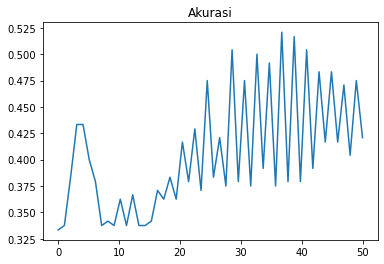

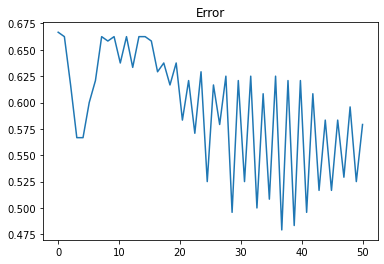

In [20]:
# Visualisasi
def visualize(arr, title=''):
    x_axis = np.linspace(0, len(arr), len(arr))
    plt.plot(x_axis, arr)
    # plt.axis([0,len(arr), 0, 1])
    plt.title(title)
    plt.show()

print("Visualisasi Akurasi - Error (LR 0.2):")   
visualize(accList, 'Akurasi')
# print(accList)
visualize(errorList, 'Error')
# accList

# Learning Rate 0.8

In [21]:
print("TRAINING (LR 0.8)")
(input_unit, hidden_unit, output_unit) = defineStructure(X_train, Y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))
parameters, accList, errorList, predictions = training(X_train, Y_train, 80, num_iterations=50, learning_rate=0.8)
print(predictions)
print(Y_train)
# print(np.argmax(Y_train, axis=0))

TRAINING (LR 0.8)
The size of the input layer is:  = 76800
The size of the hidden layer is:  = 80
The size of the output layer is:  = 3
76800 80 3
[[0.49245524 0.491796   0.49198533 0.49051949 0.49454396 0.49304887
  0.4953626  0.49442202 0.49314473 0.49445901 0.49538158 0.49047172
  0.4881359  0.48926275 0.49582056 0.49141319 0.4965505  0.49431566
  0.49303889 0.4937722  0.49092015 0.4925752  0.49426124 0.48723086
  0.4937573  0.49000597 0.49044142 0.49165062 0.49417084 0.49267765
  0.49431236 0.49489075 0.4901894  0.49089443 0.49301991 0.49586717
  0.49389213 0.48773612 0.49358646 0.49569992 0.4918466  0.49232882
  0.48873743 0.49164764 0.49473567 0.49137564 0.49352576 0.49626147
  0.49137255 0.49605674 0.49129472 0.49218254 0.49238596 0.48977883
  0.49404636 0.49241772 0.49322969 0.49559787 0.49748361 0.4927118
  0.49443553 0.49060866 0.49112737 0.49298672 0.49282289 0.49282827
  0.49168897 0.49190249 0.49302524 0.49277177 0.49032942 0.49297366
  0.4895515  0.49217312 0.49206016 0.4

[[0.02272199 0.02276838 0.01975205 0.01990299 0.02136546 0.02266099
  0.02211694 0.02036153 0.02289792 0.02185039 0.01863192 0.02333157
  0.02301132 0.02082859 0.02100064 0.02322515 0.0211649  0.02277293
  0.02505604 0.02329307 0.02264716 0.02064427 0.02187413 0.02421505
  0.02225659 0.02098009 0.0198344  0.02252159 0.02211473 0.02058507
  0.02210969 0.01945934 0.02106123 0.0242399  0.02163192 0.02023245
  0.02211777 0.02235724 0.0202586  0.02160677 0.02269599 0.02206685
  0.02219472 0.02216845 0.02097603 0.02247157 0.02069429 0.02071429
  0.02840833 0.01969334 0.02372244 0.02148317 0.01978724 0.02129659
  0.02080942 0.02088121 0.0216608  0.01693569 0.02109328 0.02119981
  0.0220843  0.02032176 0.0228009  0.02132351 0.0219846  0.0217756
  0.02132733 0.0216182  0.02186025 0.02123944 0.02262859 0.02138213
  0.02336551 0.02220009 0.02112842 0.02034712 0.02240817 0.02170411
  0.02078104 0.02008942 0.01882284 0.02280279 0.01909114 0.02163327
  0.01954478 0.02092099 0.02010636 0.02203549 0.0

<ipython-input-10-7a57b3e79abb>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


[[0.9992222  0.99924487 0.99923131 0.99922172 0.99925218 0.99918449
  0.99925237 0.99926507 0.99926649 0.99924193 0.99921612 0.99926572
  0.99925755 0.99922885 0.99920476 0.99926276 0.99924761 0.99924678
  0.9989895  0.99924136 0.99922404 0.99907271 0.99922377 0.99929099
  0.99923878 0.99922628 0.99926249 0.99921818 0.99927493 0.99909153
  0.99924001 0.99920487 0.99927968 0.99927969 0.99923651 0.99923683
  0.99925969 0.99921235 0.99922057 0.99924125 0.999267   0.9992516
  0.99924877 0.9992304  0.99927457 0.99924038 0.99922259 0.99924938
  0.99863441 0.99923049 0.99930194 0.99921687 0.99929797 0.99924928
  0.99920958 0.99924469 0.99923366 0.99924438 0.99924922 0.99924122
  0.99919615 0.99922577 0.99922833 0.99925467 0.99923413 0.99929269
  0.99918769 0.99923778 0.99922371 0.99922654 0.99924866 0.99923805
  0.99923901 0.9992265  0.99920564 0.99920019 0.99923534 0.9991907
  0.99923235 0.99923175 0.99915772 0.99925121 0.99920077 0.99926948
  0.99925417 0.99922027 0.99923451 0.99923506 0.99

[[0.93748855 0.93749873 0.9414384  0.94161044 0.93826288 0.94141121
  0.93757614 0.9423002  0.93748756 0.93754041 0.94348766 0.9374893
  0.93747764 0.9376167  0.93783292 0.93747538 0.94066853 0.93815485
  0.94392135 0.93748825 0.93757303 0.94597297 0.93767655 0.93748437
  0.93785236 0.93934031 0.94315085 0.93777653 0.93758611 0.94595913
  0.93755547 0.94093114 0.93975674 0.93747151 0.93822203 0.93813629
  0.93765144 0.94133487 0.94124341 0.93785118 0.93753981 0.9398049
  0.9375628  0.93798199 0.93776458 0.93857272 0.94115165 0.94172735
  0.94911593 0.94132256 0.93760364 0.93767342 0.9429658  0.93765969
  0.93962522 0.94240104 0.93777672 0.94370891 0.94238793 0.938782
  0.94022309 0.94256549 0.93752535 0.93784157 0.93775638 0.93855177
  0.93823163 0.9384408  0.93793197 0.93793763 0.93750291 0.93850649
  0.93817727 0.93755392 0.93785028 0.94114693 0.93750406 0.93916777
  0.93975456 0.94203023 0.9453537  0.93766836 0.94217928 0.93757099
  0.94149726 0.93810143 0.93994426 0.93805502 0.9427

[[0.00238212 0.00238213 0.00238192 0.00236838 0.00238213 0.00244567
  0.00238387 0.00188773 0.00238214 0.00238213 0.00182872 0.00238216
  0.00238218 0.00238359 0.00238263 0.00238213 0.00238228 0.00238287
  0.00271343 0.00238219 0.00238212 0.00203348 0.00238216 0.00238215
  0.00238333 0.00238214 0.00182611 0.00238216 0.00238215 0.00205796
  0.00238212 0.0022526  0.00238314 0.00238215 0.0023822  0.00238246
  0.00238214 0.00247396 0.00238192 0.0023823  0.00238215 0.00238374
  0.00238215 0.00238225 0.00238252 0.00238366 0.00237574 0.00237091
  0.00327017 0.00204327 0.00239575 0.00238218 0.00182791 0.00238238
  0.00238114 0.00233651 0.00238217 0.00182795 0.00183125 0.00238239
  0.00242193 0.00230467 0.00238213 0.00238244 0.00238214 0.00238465
  0.00238283 0.00238259 0.00238213 0.00238213 0.00238213 0.00238257
  0.00238249 0.00238212 0.00238374 0.00190058 0.00238212 0.00238756
  0.00238506 0.00185164 0.00190303 0.00238351 0.0018683  0.00238213
  0.00212641 0.0023825  0.002382   0.00238301 0.

[[2.63405865e-10 2.63405865e-10 2.63413891e-10 2.63406355e-10
  2.63405867e-10 2.65069059e-10 2.63407056e-10 2.63483003e-10
  2.63405867e-10 2.63405866e-10 2.63436248e-10 2.63405867e-10
  2.63405868e-10 2.63409988e-10 2.63406736e-10 2.63405865e-10
  2.63405983e-10 2.63406941e-10 2.92123902e-10 2.63405866e-10
  2.63405865e-10 2.66084857e-10 2.63405870e-10 2.63405869e-10
  2.63407082e-10 2.63405870e-10 2.63410915e-10 2.63405870e-10
  2.63405869e-10 2.65459029e-10 2.63405865e-10 2.63409402e-10
  2.63407985e-10 2.63405865e-10 2.63405873e-10 2.63406043e-10
  2.63405868e-10 2.65880081e-10 2.63406952e-10 2.63405960e-10
  2.63405868e-10 2.63408165e-10 2.63405867e-10 2.63405929e-10
  2.63406234e-10 2.63407712e-10 2.63405873e-10 2.63405881e-10
  4.47195753e-10 2.63429260e-10 2.63413492e-10 2.63405881e-10
  2.63409682e-10 2.63405994e-10 2.63407463e-10 2.63412828e-10
  2.63405888e-10 2.63408571e-10 2.63406071e-10 2.63406076e-10
  2.64142308e-10 2.63446259e-10 2.63405866e-10 2.63405969e-10
  2.6340

[[0.00518205 0.00518205 0.00518469 0.00518236 0.00518206 0.00524593
  0.0051823  0.00519499 0.00518205 0.00518205 0.00519369 0.00518205
  0.00518205 0.00518302 0.00518231 0.00518205 0.00518221 0.00518252
  0.00588846 0.00518205 0.00518205 0.00534762 0.00518206 0.00518205
  0.0051823  0.00518207 0.00518453 0.00518206 0.00518206 0.00533296
  0.00518205 0.00518328 0.00518288 0.00518205 0.00518206 0.00518215
  0.00518206 0.00526861 0.00518268 0.00518207 0.00518206 0.00518257
  0.00518205 0.00518211 0.00518222 0.00518249 0.00518208 0.00518209
  0.00918641 0.00518743 0.00518262 0.00518207 0.00518438 0.00518209
  0.00518285 0.00518417 0.00518207 0.00518478 0.00518234 0.00518213
  0.005226   0.00518757 0.00518205 0.0051821  0.00518206 0.00518328
  0.00518218 0.00518258 0.00518206 0.00518205 0.00518205 0.00518236
  0.00518216 0.00518205 0.00518237 0.00519405 0.00518205 0.00518482
  0.00518432 0.00518282 0.00535493 0.00518265 0.00519065 0.00518205
  0.00518636 0.00518216 0.00518348 0.00518248 0.

[Cost, Acc, Err] after iteration 10: 22.122196 0.333333 0.666667
[[3.37111585e-10 3.37111586e-10 3.37117401e-10 3.37112720e-10
  3.37111595e-10 3.39222306e-10 3.37116389e-10 3.37158302e-10
  3.37111596e-10 3.37111593e-10 3.37125065e-10 3.37111617e-10
  3.37111602e-10 3.37117896e-10 3.37116125e-10 3.37111597e-10
  3.37111856e-10 3.37114699e-10 3.85854370e-10 3.37111632e-10
  3.37111586e-10 3.39399558e-10 3.37111615e-10 3.37111643e-10
  3.37115307e-10 3.37111602e-10 3.37112603e-10 3.37111635e-10
  3.37111621e-10 3.38747700e-10 3.37111585e-10 3.37125674e-10
  3.37118012e-10 3.37111587e-10 3.37111710e-10 3.37112388e-10
  3.37111614e-10 3.39543134e-10 3.37114563e-10 3.37113135e-10
  3.37111622e-10 3.37115223e-10 3.37111591e-10 3.37112138e-10
  3.37112398e-10 3.37118832e-10 3.37111608e-10 3.37111639e-10
  7.40764405e-10 3.37145746e-10 3.37164970e-10 3.37111718e-10
  3.37119123e-10 3.37112559e-10 3.37114472e-10 3.37136751e-10
  3.37111829e-10 3.37114038e-10 3.37111878e-10 3.37114775e-10
  3.3

[[0.00662224 0.00662227 0.00662941 0.00662498 0.00662237 0.00676068
  0.00662668 0.00663903 0.0066223  0.0066225  0.00663613 0.00662246
  0.00662232 0.00662626 0.00662927 0.00662244 0.00662454 0.00662826
  0.00822274 0.00662303 0.00662233 0.00677365 0.0066227  0.00662265
  0.00662525 0.00662261 0.00662343 0.00662302 0.0066225  0.00674984
  0.00662224 0.00664497 0.00663269 0.0066223  0.00662301 0.00662472
  0.00662279 0.00673146 0.00663125 0.00662637 0.00662276 0.00662494
  0.00662229 0.00662539 0.00662387 0.00663003 0.00662279 0.00662306
  0.01562241 0.00664454 0.00664671 0.00662321 0.00663805 0.00662378
  0.00662905 0.0066573  0.0066233  0.00663187 0.00662442 0.00663111
  0.00678791 0.00663742 0.0066224  0.00662478 0.0066228  0.00662834
  0.00664574 0.0066238  0.00662274 0.00662235 0.00662227 0.00662554
  0.00662301 0.00662225 0.00662983 0.00664526 0.00662272 0.00665619
  0.00663722 0.00662764 0.00670233 0.0066244  0.00664483 0.00662246
  0.00663196 0.00662641 0.00663923 0.00662732 0.

[[4.15480123e-10 4.15480124e-10 4.15494328e-10 4.15480758e-10
  4.15480126e-10 4.18677865e-10 4.15481963e-10 4.15540924e-10
  4.15480127e-10 4.15480124e-10 4.15527854e-10 4.15480132e-10
  4.15480125e-10 4.15485395e-10 4.15482481e-10 4.15480124e-10
  4.15480262e-10 4.15481399e-10 5.00223364e-10 4.15480131e-10
  4.15480123e-10 4.20373832e-10 4.15480129e-10 4.15480134e-10
  4.15484050e-10 4.15480126e-10 4.15481587e-10 4.15480132e-10
  4.15480134e-10 4.19233412e-10 4.15480123e-10 4.15493006e-10
  4.15482246e-10 4.15480124e-10 4.15480185e-10 4.15480494e-10
  4.15480127e-10 4.18822193e-10 4.15483179e-10 4.15481254e-10
  4.15480129e-10 4.15482496e-10 4.15480125e-10 4.15480242e-10
  4.15480629e-10 4.15485446e-10 4.15480130e-10 4.15480152e-10
  1.90973118e-09 4.15550491e-10 4.15497758e-10 4.15480175e-10
  4.15493155e-10 4.15480421e-10 4.15483967e-10 4.15512524e-10
  4.15480164e-10 4.15505294e-10 4.15480539e-10 4.15481021e-10
  4.17082667e-10 4.15552117e-10 4.15480124e-10 4.15480258e-10
  4.1548

[[0.00814946 0.00814946 0.00818544 0.00815277 0.00814951 0.00843231
  0.00815042 0.00817681 0.00814946 0.00814948 0.00828166 0.00814948
  0.00814946 0.00815103 0.00815506 0.00814946 0.00815166 0.00815193
  0.0126361  0.00814951 0.00814946 0.00878139 0.00814954 0.00814946
  0.00815098 0.00814958 0.00815186 0.00814963 0.00814957 0.00875094
  0.00814946 0.00819048 0.00815366 0.00814946 0.00814965 0.0081505
  0.00814954 0.00833927 0.00816838 0.00815061 0.00814954 0.00815086
  0.00814946 0.00815023 0.00815003 0.00815411 0.00814995 0.00815081
  0.02496363 0.00824852 0.00815453 0.00814991 0.00822945 0.00814976
  0.00816742 0.00825524 0.00814963 0.00857014 0.00815909 0.00815354
  0.00849795 0.00818425 0.00814946 0.00814988 0.00814951 0.00815308
  0.00815177 0.00815011 0.00814955 0.00814948 0.00814946 0.0081511
  0.00814991 0.00814946 0.00815409 0.00827992 0.00814949 0.00816579
  0.00816769 0.00815813 0.00939886 0.00815205 0.00820341 0.00814947
  0.00822432 0.00815197 0.00816562 0.00815319 0.00

[[0.99999182 0.9999914  0.99999183 0.99999173 0.99999166 0.99999166
  0.99999151 0.99999175 0.99999136 0.99999174 0.99999183 0.99999141
  0.99999125 0.99999145 0.99999173 0.99999141 0.99999183 0.99999174
  0.9999919  0.99999174 0.99999172 0.99999175 0.99999178 0.99999137
  0.99999145 0.99999173 0.99999164 0.99999178 0.99999145 0.99999176
  0.99999179 0.99999182 0.99999178 0.99999144 0.9999916  0.99999175
  0.9999918  0.99999145 0.99999183 0.99999159 0.99999177 0.99999146
  0.99999138 0.99999177 0.99999164 0.99999166 0.99999181 0.99999181
  0.99999217 0.99999181 0.99999144 0.99999175 0.99999182 0.99999144
  0.99999183 0.99999183 0.99999162 0.99999184 0.99999183 0.99999178
  0.9999918  0.99999166 0.99999152 0.99999168 0.99999174 0.99999151
  0.99999178 0.99999151 0.99999183 0.99999172 0.99999142 0.99999161
  0.99999165 0.99999175 0.9999917  0.99999177 0.99999184 0.99999167
  0.99999174 0.99999182 0.99999184 0.99999137 0.99999178 0.99999155
  0.99999181 0.99999179 0.99999179 0.99999174 0.

[[0.02223023 0.02223425 0.02243982 0.02224501 0.02223543 0.02346954
  0.02232746 0.02252883 0.02223854 0.02224294 0.02242672 0.022248
  0.02222927 0.02244482 0.02233703 0.02223803 0.02235068 0.02240294
  0.02894665 0.02231011 0.02224168 0.02518698 0.02225528 0.02226206
  0.02248181 0.02223713 0.02227087 0.0222664  0.02223325 0.02518978
  0.02222766 0.02249573 0.02236788 0.02225861 0.02235597 0.0223558
  0.02225912 0.02313828 0.02239654 0.02275683 0.02225389 0.02231025
  0.02223438 0.0223337  0.02236047 0.02256208 0.02223758 0.02225597
  0.03895354 0.02244965 0.02249049 0.02230806 0.02232995 0.02226207
  0.02241393 0.02242761 0.0222495  0.0230236  0.02226709 0.02226959
  0.02317097 0.02244085 0.02224459 0.02225853 0.0222444  0.02242328
  0.02227969 0.02227572 0.02226878 0.02223087 0.02222826 0.02235646
  0.02229263 0.02223211 0.02241912 0.02252804 0.02225768 0.02243746
  0.02247462 0.02233184 0.02500872 0.02240542 0.02249296 0.02223069
  0.02250266 0.02236905 0.0224741  0.02241676 0.022

[[9.82525315e-10 9.82525315e-10 9.82525510e-10 9.82525324e-10
  9.82525315e-10 9.83115827e-10 9.82525339e-10 9.82529367e-10
  9.82525315e-10 9.82525315e-10 9.82526398e-10 9.82525315e-10
  9.82525315e-10 9.82525490e-10 9.82525328e-10 9.82525315e-10
  9.82525318e-10 9.82525326e-10 1.00216033e-09 9.82525315e-10
  9.82525315e-10 9.85143898e-10 9.82525315e-10 9.82525315e-10
  9.82525332e-10 9.82525315e-10 9.82525374e-10 9.82525315e-10
  9.82525315e-10 9.84750536e-10 9.82525315e-10 9.82525564e-10
  9.82525324e-10 9.82525315e-10 9.82525315e-10 9.82525319e-10
  9.82525315e-10 9.83044593e-10 9.82525433e-10 9.82525315e-10
  9.82525315e-10 9.82525409e-10 9.82525315e-10 9.82525315e-10
  9.82525320e-10 9.82525518e-10 9.82525315e-10 9.82525315e-10
  1.14506930e-09 9.82526779e-10 9.82525429e-10 9.82525315e-10
  9.82525429e-10 9.82525316e-10 9.82525407e-10 9.82526598e-10
  9.82525315e-10 9.82525457e-10 9.82525317e-10 9.82525321e-10
  9.82653879e-10 9.82527851e-10 9.82525315e-10 9.82525316e-10
  9.8252

[Cost, Acc, Err] after iteration 20: 20.780869 0.333333 0.666667
[[0.01906041 0.01906041 0.01906042 0.01906041 0.01906041 0.01907367
  0.01906041 0.01906057 0.01906041 0.01906041 0.01906048 0.01906041
  0.01906041 0.01906042 0.01906041 0.01906041 0.01906041 0.01906041
  0.01944126 0.01906041 0.01906041 0.01913074 0.01906041 0.01906041
  0.01906041 0.01906041 0.01906041 0.01906041 0.01906041 0.0191259
  0.01906041 0.01906043 0.01906041 0.01906041 0.01906041 0.01906041
  0.01906041 0.01907045 0.01906042 0.01906041 0.01906041 0.01906041
  0.01906041 0.01906041 0.01906041 0.01906042 0.01906041 0.01906041
  0.02203826 0.01906048 0.01906041 0.01906041 0.01906042 0.01906041
  0.01906042 0.01906049 0.01906041 0.01906043 0.01906041 0.01906041
  0.0190642  0.0190605  0.01906041 0.01906041 0.01906041 0.01906041
  0.01906041 0.01906041 0.01906041 0.01906041 0.01906041 0.01906041
  0.01906041 0.01906041 0.01906041 0.01906061 0.01906041 0.01906049
  0.01906044 0.01906041 0.01906538 0.01906042 0.0190

[[0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.9999932
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999326 0.99999319 0.99999319 0.99999321 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999321
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.9999932  0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999358 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.9999932  0.99999319 0.99999319 0.99999319
  0.99999319 0.99999319 0.99999319 0.99999319 0.9

[[0.0074021  0.0074021  0.00740232 0.00740212 0.0074021  0.00743046
  0.00740212 0.00740324 0.0074021  0.0074021  0.0074033  0.0074021
  0.0074021  0.00740218 0.00740212 0.0074021  0.00740213 0.00740212
  0.00798579 0.0074021  0.0074021  0.00760862 0.0074021  0.0074021
  0.00740211 0.0074021  0.00740216 0.0074021  0.0074021  0.00762627
  0.0074021  0.00740245 0.00740211 0.0074021  0.0074021  0.00740211
  0.0074021  0.007418   0.00740245 0.0074021  0.0074021  0.00740214
  0.0074021  0.00740211 0.00740211 0.00740225 0.0074021  0.0074021
  0.0103685  0.00740297 0.00740213 0.0074021  0.00740236 0.0074021
  0.00740229 0.00740372 0.0074021  0.00740306 0.00740212 0.00740212
  0.0074164  0.00740267 0.0074021  0.00740211 0.0074021  0.00740212
  0.00740214 0.00740211 0.0074021  0.0074021  0.0074021  0.00740211
  0.00740211 0.0074021  0.00740214 0.00740362 0.0074021  0.00740256
  0.00740239 0.00740218 0.00744487 0.00740217 0.00740435 0.0074021
  0.00740395 0.00740211 0.00740223 0.00740212 0.00740

[Cost, Acc, Err] after iteration 25: 23.062501 0.333333 0.666667
[[2.78544984e-10 2.78544984e-10 2.78544987e-10 2.78544984e-10
  2.78544984e-10 2.78575604e-10 2.78544984e-10 2.78545123e-10
  2.78544984e-10 2.78544984e-10 2.78545017e-10 2.78544984e-10
  2.78544984e-10 2.78544985e-10 2.78544984e-10 2.78544984e-10
  2.78544984e-10 2.78544984e-10 2.80217595e-10 2.78544984e-10
  2.78544984e-10 2.78694496e-10 2.78544984e-10 2.78544984e-10
  2.78544984e-10 2.78544984e-10 2.78544985e-10 2.78544984e-10
  2.78544984e-10 2.78627140e-10 2.78544984e-10 2.78544986e-10
  2.78544984e-10 2.78544984e-10 2.78544984e-10 2.78544984e-10
  2.78544984e-10 2.78586255e-10 2.78544984e-10 2.78544984e-10
  2.78544984e-10 2.78544985e-10 2.78544984e-10 2.78544984e-10
  2.78544984e-10 2.78544985e-10 2.78544984e-10 2.78544984e-10
  3.12919990e-10 2.78545032e-10 2.78544986e-10 2.78544984e-10
  2.78544988e-10 2.78544984e-10 2.78544985e-10 2.78544990e-10
  2.78544984e-10 2.78544987e-10 2.78544984e-10 2.78544984e-10
  2.7

[[0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.0054789
  0.00547843 0.00547844 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.00547843
  0.00550224 0.00547843 0.00547843 0.00548087 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.0054798
  0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547903 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.00547843
  0.00603666 0.00547843 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547848 0.00547844 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547844 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547895 0.00547843 0.00547843 0.00547843
  0.00547843 0.00547843 0.00547843 0.00547843 0.00

[[2.11737732e-10 2.11737732e-10 2.11737736e-10 2.11737732e-10
  2.11737732e-10 2.11771545e-10 2.11737732e-10 2.11737930e-10
  2.11737732e-10 2.11737732e-10 2.11737789e-10 2.11737732e-10
  2.11737732e-10 2.11737733e-10 2.11737732e-10 2.11737732e-10
  2.11737732e-10 2.11737732e-10 2.13448421e-10 2.11737732e-10
  2.11737732e-10 2.11914589e-10 2.11737732e-10 2.11737732e-10
  2.11737732e-10 2.11737732e-10 2.11737733e-10 2.11737732e-10
  2.11737732e-10 2.11837758e-10 2.11737732e-10 2.11737734e-10
  2.11737732e-10 2.11737732e-10 2.11737732e-10 2.11737732e-10
  2.11737732e-10 2.11780633e-10 2.11737732e-10 2.11737732e-10
  2.11737732e-10 2.11737733e-10 2.11737732e-10 2.11737732e-10
  2.11737732e-10 2.11737732e-10 2.11737732e-10 2.11737732e-10
  2.54391525e-10 2.11737810e-10 2.11737734e-10 2.11737732e-10
  2.11737738e-10 2.11737732e-10 2.11737733e-10 2.11737742e-10
  2.11737732e-10 2.11737739e-10 2.11737732e-10 2.11737732e-10
  2.11741302e-10 2.11737874e-10 2.11737732e-10 2.11737732e-10
  2.1173

[[0.00416994 0.00416994 0.00416994 0.00416994 0.00416994 0.00417058
  0.00416994 0.00416995 0.00416994 0.00416994 0.00416995 0.00416994
  0.00416994 0.00416994 0.00416994 0.00416994 0.00416994 0.00416994
  0.00419886 0.00416994 0.00416994 0.00417356 0.00416994 0.00416994
  0.00416994 0.00416994 0.00416994 0.00416994 0.00416994 0.00417207
  0.00416994 0.00416994 0.00416994 0.00416994 0.00416994 0.00416994
  0.00416994 0.00417068 0.00416994 0.00416994 0.00416994 0.00416994
  0.00416994 0.00416994 0.00416994 0.00416994 0.00416994 0.00416994
  0.0050384  0.00416995 0.00416994 0.00416994 0.00416994 0.00416994
  0.00416994 0.00416995 0.00416994 0.00416995 0.00416994 0.00416994
  0.00417002 0.00416995 0.00416994 0.00416994 0.00416994 0.00416994
  0.00416994 0.00416994 0.00416994 0.00416994 0.00416994 0.00416994
  0.00416994 0.00416994 0.00416994 0.00416995 0.00416994 0.00416995
  0.00416995 0.00416994 0.00417106 0.00416994 0.00416995 0.00416994
  0.00416995 0.00416994 0.00416994 0.00416994 0.

[[1.72243374e-10 1.72243374e-10 1.72243387e-10 1.72243374e-10
  1.72243374e-10 1.72291580e-10 1.72243374e-10 1.72243777e-10
  1.72243374e-10 1.72243374e-10 1.72243528e-10 1.72243374e-10
  1.72243374e-10 1.72243377e-10 1.72243374e-10 1.72243374e-10
  1.72243374e-10 1.72243374e-10 1.74444823e-10 1.72243374e-10
  1.72243374e-10 1.72518831e-10 1.72243374e-10 1.72243374e-10
  1.72243374e-10 1.72243374e-10 1.72243376e-10 1.72243374e-10
  1.72243374e-10 1.72405698e-10 1.72243374e-10 1.72243381e-10
  1.72243374e-10 1.72243374e-10 1.72243374e-10 1.72243374e-10
  1.72243374e-10 1.72298864e-10 1.72243375e-10 1.72243374e-10
  1.72243374e-10 1.72243375e-10 1.72243374e-10 1.72243374e-10
  1.72243374e-10 1.72243375e-10 1.72243374e-10 1.72243374e-10
  2.44826817e-10 1.72243573e-10 1.72243378e-10 1.72243374e-10
  1.72243394e-10 1.72243374e-10 1.72243375e-10 1.72243402e-10
  1.72243374e-10 1.72243399e-10 1.72243374e-10 1.72243374e-10
  1.72249527e-10 1.72243654e-10 1.72243374e-10 1.72243374e-10
  1.7224

[[0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00339621
  0.00339479 0.00339481 0.00339479 0.00339479 0.0033948  0.00339479
  0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00339479
  0.00345039 0.00339479 0.00339479 0.0034042  0.00339479 0.00339479
  0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00340074
  0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00339479
  0.00339479 0.00339617 0.00339479 0.00339479 0.00339479 0.00339479
  0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00339479
  0.00530556 0.0033948  0.00339479 0.00339479 0.00339479 0.00339479
  0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00339479
  0.00339504 0.0033948  0.00339479 0.00339479 0.00339479 0.00339479
  0.00339479 0.00339479 0.00339479 0.00339479 0.00339479 0.00339479
  0.00339479 0.00339479 0.00339479 0.00339481 0.00339479 0.00339479
  0.00339479 0.00339479 0.00340035 0.00339479 0.0033948  0.00339479
  0.0033948  0.00339479 0.00339479 0.00339479 0.

[[1.46247205e-10 1.46247205e-10 1.46247358e-10 1.46247208e-10
  1.46247205e-10 1.46365585e-10 1.46247208e-10 1.46249029e-10
  1.46247205e-10 1.46247205e-10 1.46248405e-10 1.46247205e-10
  1.46247205e-10 1.46247226e-10 1.46247206e-10 1.46247205e-10
  1.46247205e-10 1.46247206e-10 1.50926057e-10 1.46247205e-10
  1.46247205e-10 1.46977260e-10 1.46247205e-10 1.46247205e-10
  1.46247207e-10 1.46247205e-10 1.46247221e-10 1.46247205e-10
  1.46247205e-10 1.46708183e-10 1.46247205e-10 1.46247297e-10
  1.46247209e-10 1.46247205e-10 1.46247205e-10 1.46247205e-10
  1.46247205e-10 1.46357920e-10 1.46247221e-10 1.46247205e-10
  1.46247205e-10 1.46247211e-10 1.46247205e-10 1.46247205e-10
  1.46247205e-10 1.46247213e-10 1.46247205e-10 1.46247205e-10
  3.50273281e-10 1.46248694e-10 1.46247226e-10 1.46247205e-10
  1.46247422e-10 1.46247205e-10 1.46247227e-10 1.46247464e-10
  1.46247205e-10 1.46247565e-10 1.46247208e-10 1.46247206e-10
  1.46269954e-10 1.46248403e-10 1.46247205e-10 1.46247205e-10
  1.4624

[Cost, Acc, Err] after iteration 35: 22.659615 0.333333 0.666667
[[0.0028839  0.0028839  0.00288411 0.0028839  0.0028839  0.00289424
  0.0028839  0.00288448 0.0028839  0.0028839  0.00288506 0.0028839
  0.0028839  0.00288391 0.0028839  0.0028839  0.0028839  0.0028839
  0.00316902 0.0028839  0.0028839  0.00297159 0.0028839  0.0028839
  0.0028839  0.0028839  0.00288391 0.0028839  0.0028839  0.00294891
  0.0028839  0.00288404 0.0028839  0.0028839  0.0028839  0.0028839
  0.0028839  0.00289066 0.00288394 0.0028839  0.0028839  0.0028839
  0.0028839  0.0028839  0.0028839  0.0028839  0.0028839  0.0028839
  0.00587618 0.00288496 0.0028839  0.0028839  0.00288429 0.0028839
  0.00288394 0.00288421 0.0028839  0.00288508 0.00288392 0.0028839
  0.00288793 0.00288423 0.0028839  0.0028839  0.0028839  0.0028839
  0.0028839  0.0028839  0.0028839  0.0028839  0.0028839  0.0028839
  0.0028839  0.0028839  0.0028839  0.00288465 0.0028839  0.00288397
  0.00288399 0.00288393 0.00309819 0.00288391 0.00288447 0.00

[[1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46221263e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46411261e-10 1.46220420e-10
  1.46220420e-10 1.46221679e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46221013e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46221776e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.51688267e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220420e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.46220519e-10 1.46220420e-10 1.46220420e-10 1.46220420e-10
  1.4622

[[0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288338
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288555 0.00288337 0.00288337 0.00288339 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288338
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288339 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00294875 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.00288337 0.00288337
  0.00288337 0.00288337 0.00288337 0.00288337 0.

[Cost, Acc, Err] after iteration 40: 21.518841 0.333333 0.666667
[[1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26602045e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26775443e-10 1.26601282e-10
  1.26601282e-10 1.26602451e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601836e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26602508e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.31950308e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.26601282e-10 1.26601282e-10 1.26601282e-10 1.26601282e-10
  1.2

[[0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249747
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249947 0.00249746 0.00249746 0.00249748 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249747
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249748 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00256263 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.00249746 0.00249746
  0.00249746 0.00249746 0.00249746 0.00249746 0.

[[1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11787344e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11949657e-10 1.11786637e-10
  1.11786637e-10 1.11787754e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11787169e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11787772e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.17235440e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786637e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.11786724e-10 1.11786637e-10 1.11786637e-10 1.11786637e-10
  1.1178

[[0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220587
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220775 0.00220586 0.00220586 0.00220587 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220587
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220587 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00227388 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.00220586 0.00220586
  0.00220586 0.00220586 0.00220586 0.00220586 0.

[[1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00186252e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00341690e-10 1.00185583e-10
  1.00185583e-10 1.00186677e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00186108e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00186656e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.05987523e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185583e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.00185668e-10 1.00185583e-10 1.00185583e-10 1.00185583e-10
  1.0018

[[0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.0019774
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197922 0.00197739 0.00197739 0.0019774  0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.0019774
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.0019774  0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00205234 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00197739 0.00197739
  0.00197739 0.00197739 0.00197739 0.00197739 0.00

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.
  0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
  0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 

In [22]:
print("TESTING (LR 0.8)")
predictions = prediction(parameters, X_test)
acc, err = accuracy(predictions, Y_test)
print ("[Acc, Err] for testing data: %f %f" %(acc, err))

TESTING (LR 0.8)
[Acc, Err] for testing data: 0.333333 0.666667


<ipython-input-10-7a57b3e79abb>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Visualisasi Akurasi - Error (LR 0.8):


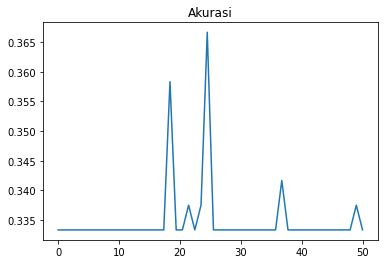

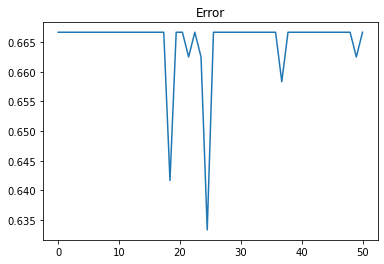

In [23]:
# Visualize
def visualize(arr, title=''):
    x_axis = np.linspace(0, len(arr), len(arr))
    plt.plot(x_axis, arr)
    # plt.axis([0,len(arr), 0, 1])
    plt.title(title)
    plt.show()

print("Visualisasi Akurasi - Error (LR 0.8):")    
visualize(accList, 'Akurasi')
# print(accList)
visualize(errorList, 'Error')
# accList